In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import functools

plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)  # fontsize of the tick labels
plt.rc("ytick", labelsize=14)
mpl.rcParams["lines.linewidth"] = 3


def make_cartesian_plane(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")


def remove_spines(ax):
    ax.spines[["right", "top"]].set_visible(False)

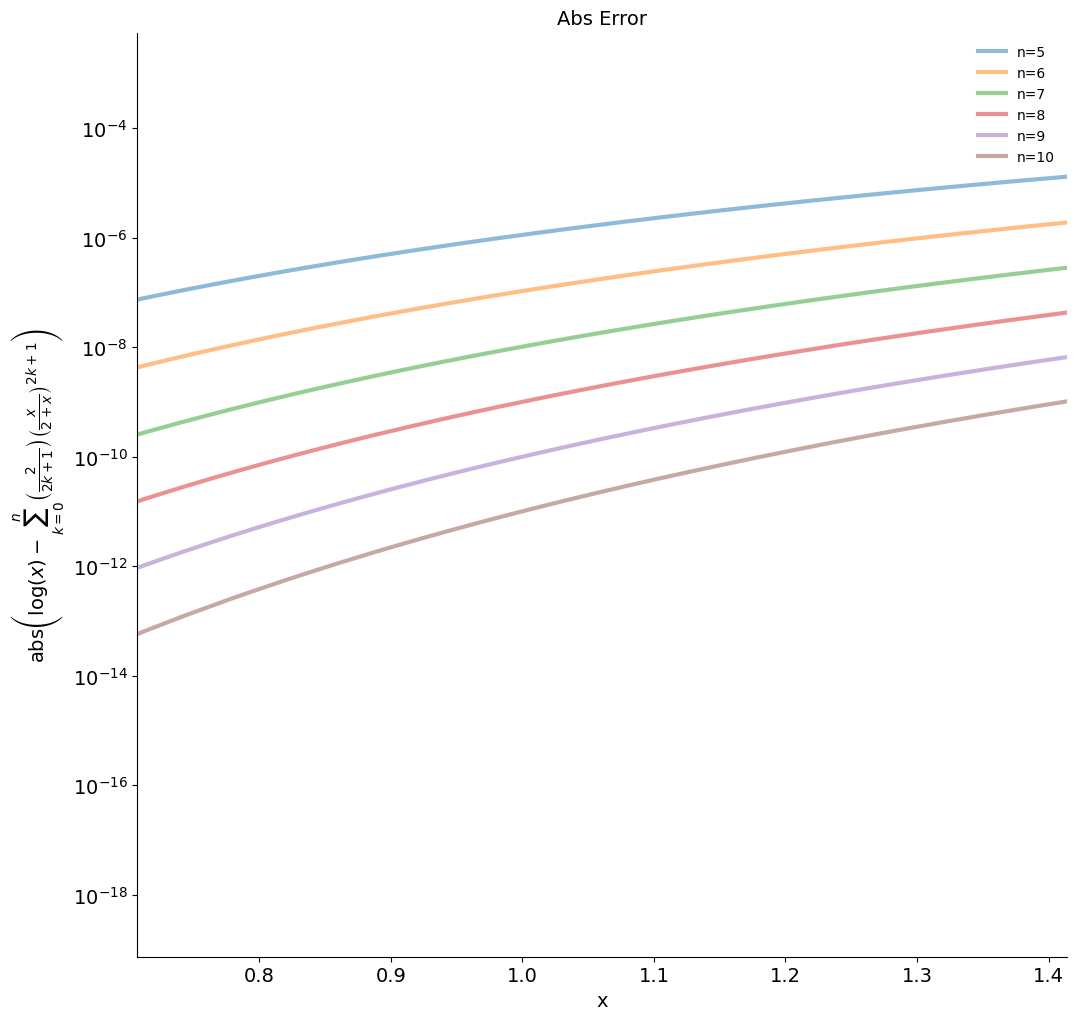

In [3]:
def log_approx(x, n: int = 10):
    ys = np.zeros_like(x)
    for k in range(n):
        ys += 2 / (2 * k + 1) * (x / (2 + x)) ** (2 * k + 1)

    return ys


xs = np.linspace(0, 3, 1000)
ys = np.log1p(xs)

plt.figure(figsize=(12, 12))

for n in range(5, 11):
    y_hat = log_approx(xs, n=n)
    plt.semilogy(xs, np.abs(y_hat - ys), alpha=0.5, label=f"{n=}")

plt.xlim([np.sqrt(2) / 2, np.sqrt(2)])
plt.xlabel("x")
plt.ylabel(
    r"$\text{abs}\left(\log(x) - \sum_{k=0}^n \left(\frac{2}{2k+1}\right)\left(\frac{x}{2+x}\right)^{2k+1}\right)$"
)
plt.legend(frameon=False)
plt.title("Abs Error", fontsize=14)
remove_spines(plt.gca())

In [7]:
def lagrange_interpolate(x: np.ndarray, pts: list[tuple[int, int]]):
    assert all(len(p) == 2 for p in pts)

    result = 0
    for i, (x_i, y_i) in enumerate(pts):
        num = denom = 1
        for j, (x_j, _) in enumerate(pts):
            if i != j:
                num *= x - x_j
                denom *= x_i - x_j

        ell_i = num / denom
        result += y_i * ell_i

    return result


# Define the Lagrange basis polynomials
def lagrange_basis(x, i, x_points):
    x_i = x_points[i]
    num = np.prod([(x - x_j) for j, x_j in enumerate(x_points) if j != i], axis=0)
    denom = np.prod([(x_i - x_j) for j, x_j in enumerate(x_points) if j != i])
    return num / denom


# Generate the Lagrange interpolation polynomial
def lagrange_interpolation(x, x_points, y_points):
    return sum(y_i * lagrange_basis(x, i, x_points) for i, y_i in enumerate(y_points))

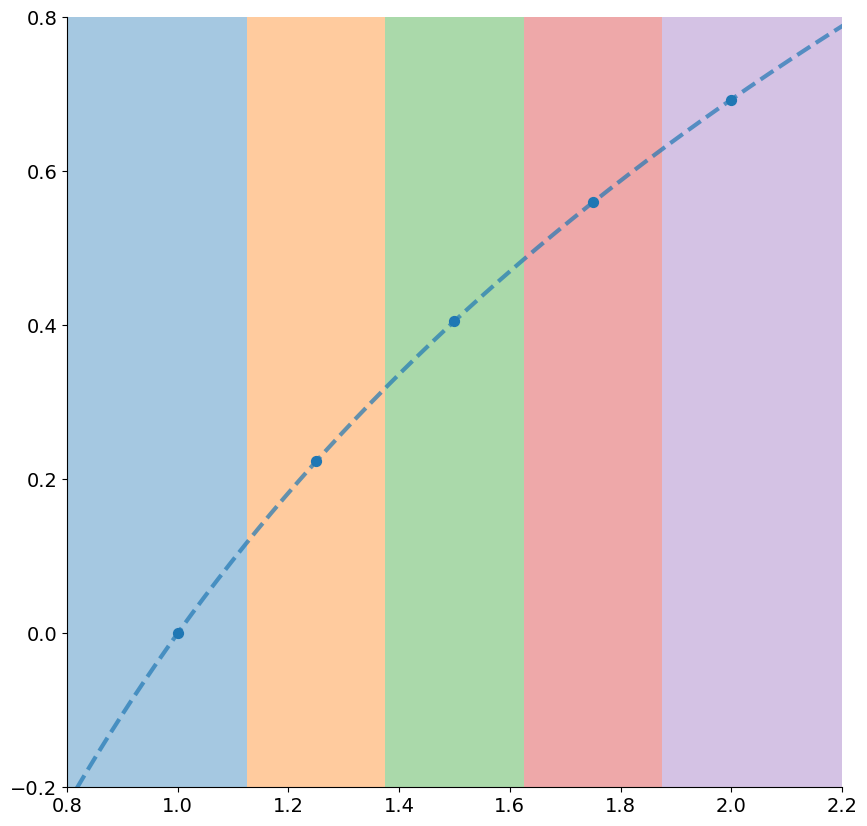

In [49]:
plt.figure(figsize=(10, 10))

xs = np.linspace(0.5, 2.5, 1000)
ys = np.log(xs)

n_points = 5
x_points = np.linspace(1, 2, n_points)
y_points = np.log(x_points)

delta_x = x_points[1] - x_points[0]
for i in range(n_points):
    if i == 0:
        x_fill = np.linspace(0.8, 1 + delta_x / 2, 5, endpoint=True)
    elif i == n_points - 1:
        x_fill = np.linspace(2.0 - delta_x / 2, 2.2, 5, endpoint=True)
    else:
        x_fill = np.linspace(1.0 + i * delta_x, 1 + (i + 1) * delta_x, 5, endpoint=True) - delta_x / 2

    y_1 = -0.2 * np.ones_like(x_fill)
    y_2 = 0.8 * np.ones_like(x_fill)

    plt.fill_between(x_fill, y_1, y_2, alpha=0.4)

plt.plot(xs, ys, "--", alpha=0.7)
plt.scatter(x_points, y_points, s=50, color="tab:blue", zorder=100)

plt.xlim([0.8, 2.2])
plt.ylim([-0.2, 0.8])
remove_spines(plt.gca())

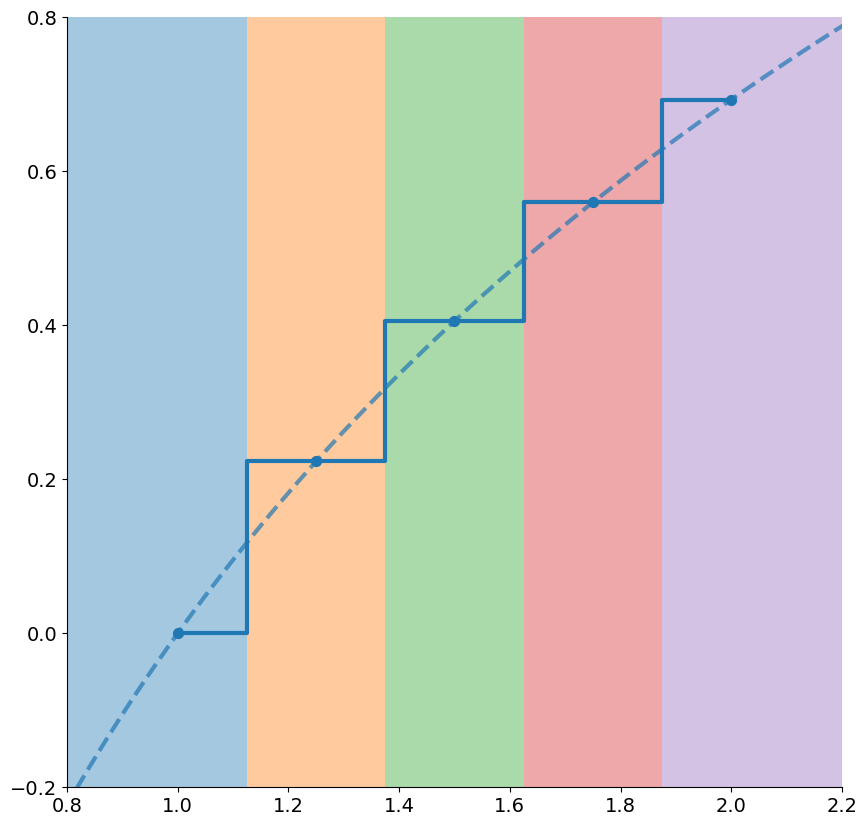

In [5]:
# zero order hold
plt.figure(figsize=(10, 10))

xs = np.linspace(0.5, 2.5, 1000)
ys = np.log(xs)

n_points = 5
x_points = np.linspace(1, 2, n_points)
y_points = np.log(x_points)

delta_x = x_points[1] - x_points[0]

for i in range(n_points):
    if i == 0:
        x_fill = np.linspace(0.8, 1 + delta_x / 2, 5, endpoint=True)
    elif i == n_points - 1:
        x_fill = np.linspace(2.0 - delta_x / 2, 2.2, 5, endpoint=True)
    else:
        x_fill = np.linspace(1.0 + i * delta_x, 1 + (i + 1) * delta_x, 5, endpoint=True) - delta_x / 2

    y_1 = -0.2 * np.ones_like(x_fill)
    y_2 = 0.8 * np.ones_like(x_fill)

    plt.fill_between(x_fill, y_1, y_2, alpha=0.4)

plt.plot(xs, ys, "--", alpha=0.7)
plt.step(x_points, y_points, where="mid", color="tab:blue")
plt.scatter(x_points, y_points, s=50, color="tab:blue")

plt.xlim([0.8, 2.2])
plt.ylim([-0.2, 0.8])
remove_spines(plt.gca())

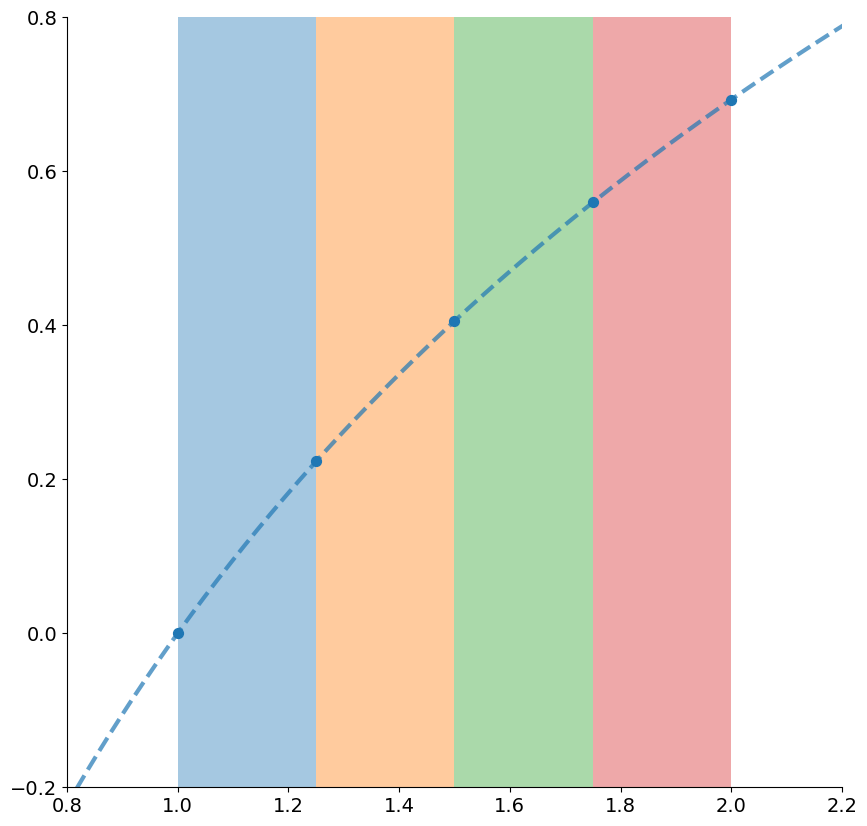

In [51]:
plt.figure(figsize=(10, 10))

xs = np.linspace(0.5, 2.5, 1000)
ys = np.log(xs)

n_points = 5
x_points = np.linspace(1, 2, n_points)
y_points = np.log(x_points)

for i in range(1, n_points):
    x_fill = np.linspace(1.0 + (i - 1) * delta_x, 1 + i * delta_x, 5, endpoint=True)

    y_1 = -0.2 * np.ones_like(x_fill)
    y_2 = 0.8 * np.ones_like(x_fill)

    plt.fill_between(x_fill, y_1, y_2, alpha=0.4)

plt.plot(xs, ys, "--", alpha=0.7)
plt.scatter(x_points, y_points, s=50, color="tab:blue")

plt.xlim([0.8, 2.2])
plt.ylim([-0.2, 0.8])
remove_spines(plt.gca())

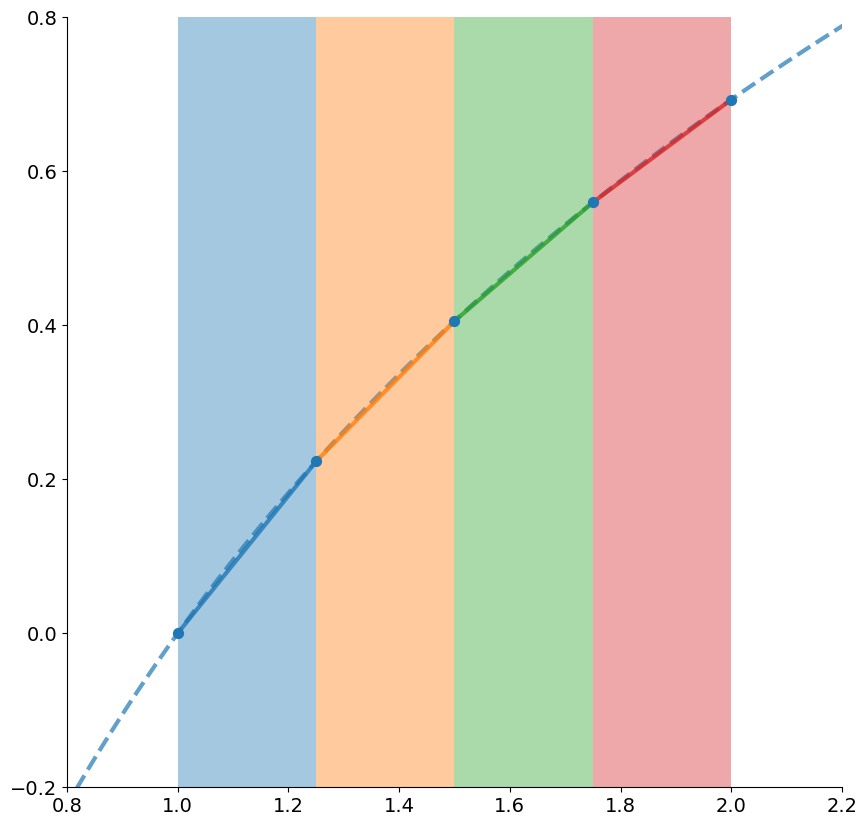

In [10]:
plt.figure(figsize=(10, 10))

xs = np.linspace(0.5, 2.5, 1000)
ys = np.log(xs)
# plt.plot(xs, ys, "--", alpha=0.7, color="tab:blue")

n_points = 5
x_points = np.linspace(1, 2, n_points)
y_points = np.log(x_points)

delta_x = x_points[1] - x_points[0]

for i in range(1, n_points):
    x_fill = np.linspace(1.0 + (i - 1) * delta_x, 1 + i * delta_x, 5, endpoint=True)

    y_1 = -0.2 * np.ones_like(x_fill)
    y_2 = 0.8 * np.ones_like(x_fill)

    plt.fill_between(x_fill, y_1, y_2, alpha=0.4)
    
for i in range(1, n_points):
    x_plot = np.linspace(x_points[i - 1], x_points[i], 3)
    y_linear = lagrange_interpolation(x_plot, x_points[i - 1 : i + 1], y_points[i - 1 : i + 1])

    plt.plot(x_plot, y_linear, alpha=0.8)

plt.scatter(x_points, y_points, s=50, zorder=100, color="tab:blue")
plt.plot(xs, ys, "--", alpha=0.7, color="tab:blue", zorder=0)

plt.xlim([0.8, 2.2])
plt.ylim([-0.2, 0.8])
remove_spines(plt.gca())

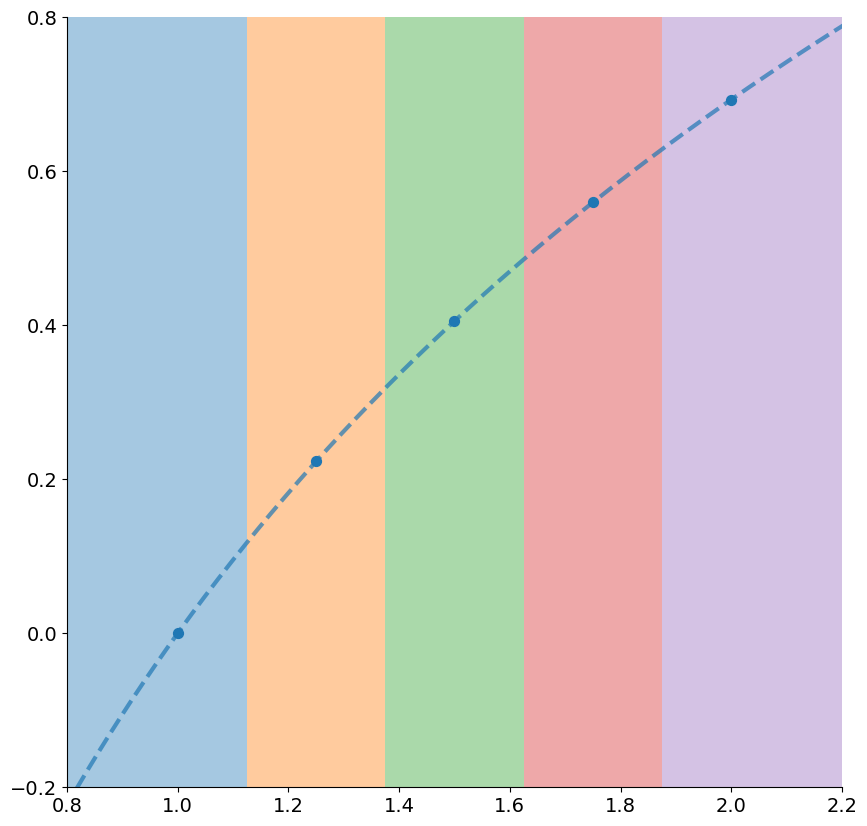

In [58]:
plt.figure(figsize=(10, 10))

xs = np.linspace(0.5, 2.5, 1000)
ys = np.log(xs)

n_points = 5
x_points = np.linspace(1, 2, n_points)
y_points = np.log(x_points)

delta_x = x_points[1] - x_points[0]
for i in range(n_points):
    if i == 0:
        x_fill = np.linspace(0.8, 1 + delta_x / 2, 5, endpoint=True)
    elif i == n_points - 1:
        x_fill = np.linspace(2.0 - delta_x / 2, 2.2, 5, endpoint=True)
    else:
        x_fill = np.linspace(1.0 + i * delta_x, 1 + (i + 1) * delta_x, 5, endpoint=True) - delta_x / 2

    y_1 = -0.2 * np.ones_like(x_fill)
    y_2 = 0.8 * np.ones_like(x_fill)

    plt.fill_between(x_fill, y_1, y_2, alpha=0.4)

plt.plot(xs, ys, "--", alpha=0.7)
plt.scatter(x_points, y_points, s=50, color="tab:blue")

plt.xlim([0.8, 2.2])
plt.ylim([-0.2, 0.8])
remove_spines(plt.gca())

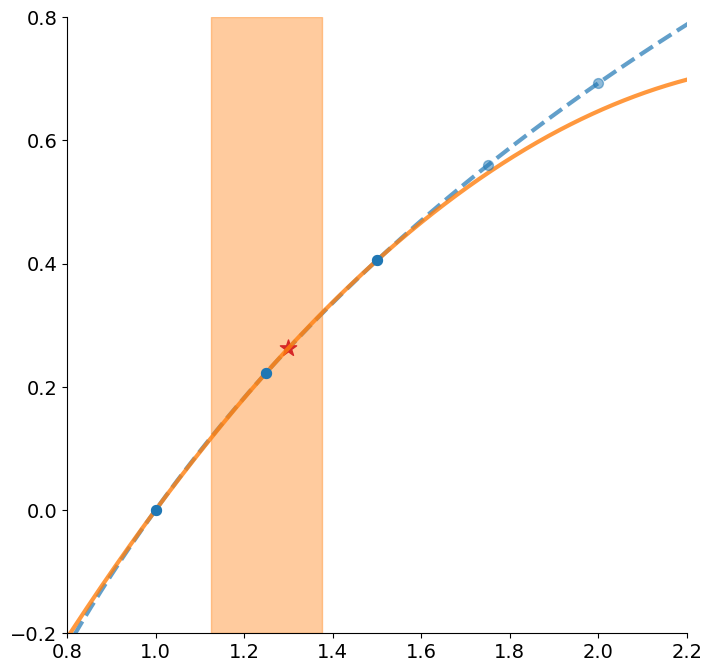

In [11]:
n_points = 5
x_points = np.linspace(1, 2, n_points)
y_points = np.log(x_points)
p = 2


plt.figure(figsize=(8, 8))

xs = np.linspace(0.5, 2.5, 1000)
ys = np.log(xs)

delta_x = x_points[1] - x_points[0]

y_quadratic = lagrange_interpolation(xs, x_points[0 : p + 1], y_points[0 : p + 1])
plt.plot(xs, y_quadratic, alpha=0.8, color="tab:orange")

x_fill = np.linspace(x_points[1] - delta_x / 2, x_points[1] + delta_x / 2, 5, endpoint=True)

y_1 = -0.2 * np.ones_like(x_fill)
y_2 = 0.8 * np.ones_like(x_fill)

plt.fill_between(x_fill, y_1, y_2, alpha=0.4, color="tab:orange")

plt.scatter(x_points, y_points, s=50, zorder=100, color="tab:blue", alpha=0.5)
plt.scatter(x_points[0 : p + 1], y_points[0 : p + 1], s=50, zorder=100, color="tab:blue")

plt.plot(xs, ys, "--", alpha=0.7, color="tab:blue", zorder=0)
plt.scatter([1.3], [np.log(1.3)], marker="*", s=150, color="tab:red")

plt.xlim([0.8, 2.2])
plt.ylim([-0.2, 0.8])

remove_spines(plt.gca())

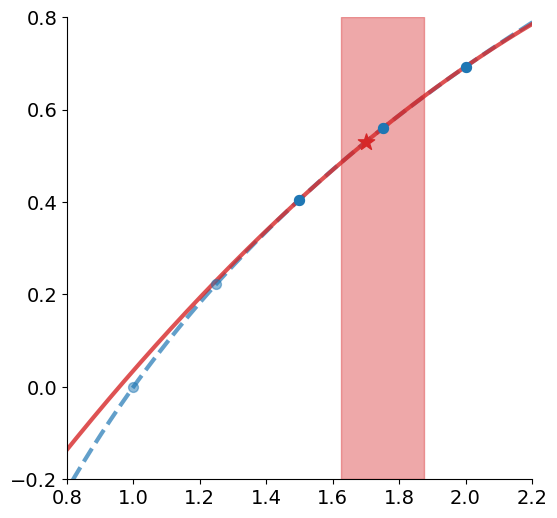

In [112]:
n_points = 5
x_points = np.linspace(1, 2, n_points)
y_points = np.log(x_points)
p = 2

plt.figure(figsize=(8, 8))

xs = np.linspace(0.5, 2.5, 1000)
ys = np.log(xs)

delta_x = x_points[1] - x_points[0]

y_quadratic = lagrange_interpolation(xs, x_points[2 : 2 + p + 1], y_points[2 : 2 + p + 1])
plt.plot(xs, y_quadratic, alpha=0.8, color="tab:red")

x_fill = np.linspace(x_points[3] - delta_x / 2, x_points[3] + delta_x / 2, 5, endpoint=True)

y_1 = -0.2 * np.ones_like(x_fill)
y_2 = 0.8 * np.ones_like(x_fill)

plt.fill_between(x_fill, y_1, y_2, alpha=0.4, color="tab:red")

plt.scatter(x_points, y_points, s=50, zorder=100, color="tab:blue", alpha=0.5)
plt.scatter(x_points[2 : 2 + p + 1], y_points[2 : 2 + p + 1], s=50, zorder=100, color="tab:blue")

plt.plot(xs, ys, "--", alpha=0.7, color="tab:blue", zorder=0)
plt.scatter([1.7], [np.log(1.7)], marker="*", s=150, color="tab:red")

plt.xlim([0.8, 2.2])
plt.ylim([-0.2, 0.8])

remove_spines(plt.gca())

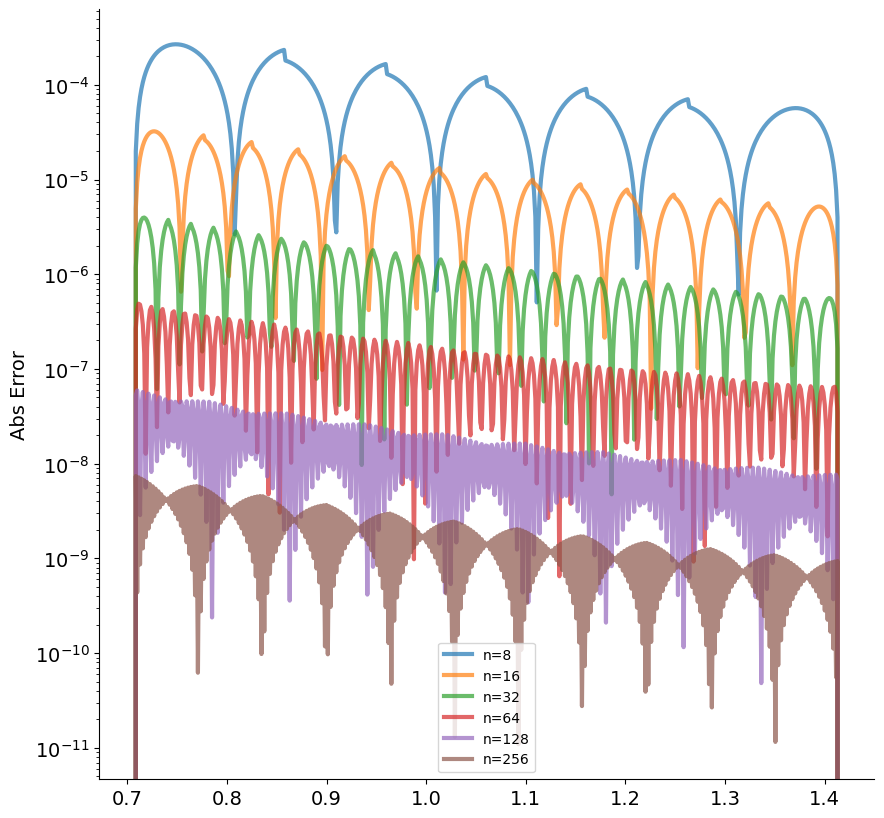

In [13]:
plt.figure(figsize=(10, 10))
polynomial_order = 2
a = 1 / np.sqrt(2)
b = np.sqrt(2)

for n_values in [8, 16, 32, 64, 128, 256]:
    x_points = np.linspace(a, b, n_values)
    y_points = np.log(x_points)
    delta_x = x_points[1] - x_points[0]

    xs = np.linspace(a, b, 500)

    ys = np.log(xs)
    # fix the bin edges to be shifted by delta_x /2
    bin_indices = np.digitize(xs, x_points - delta_x / 2)
    ys_lagrange = np.zeros_like(xs)
    for i, idx in enumerate(bin_indices):
        idx = idx.item()

        if idx <= 1:
            y_val = lagrange_interpolation([xs[i]], x_points[: polynomial_order + 1], y_points[: polynomial_order + 1])
        elif idx == n_values:
            y_val = lagrange_interpolation(
                [xs[i]], x_points[idx - polynomial_order - 1 : idx], y_points[idx - polynomial_order - 1 : idx]
            )
        else:
            y_val = lagrange_interpolation(
                [xs[i]], x_points[idx - polynomial_order : idx + 1], y_points[idx - polynomial_order : idx + 1]
            )

        ys_lagrange[i] = y_val[0]

    plt.semilogy(xs, np.abs(ys - ys_lagrange), alpha=0.7, label=f"n={n_values}")
remove_spines(plt.gca())
plt.ylabel("Abs Error")
plt.legend()

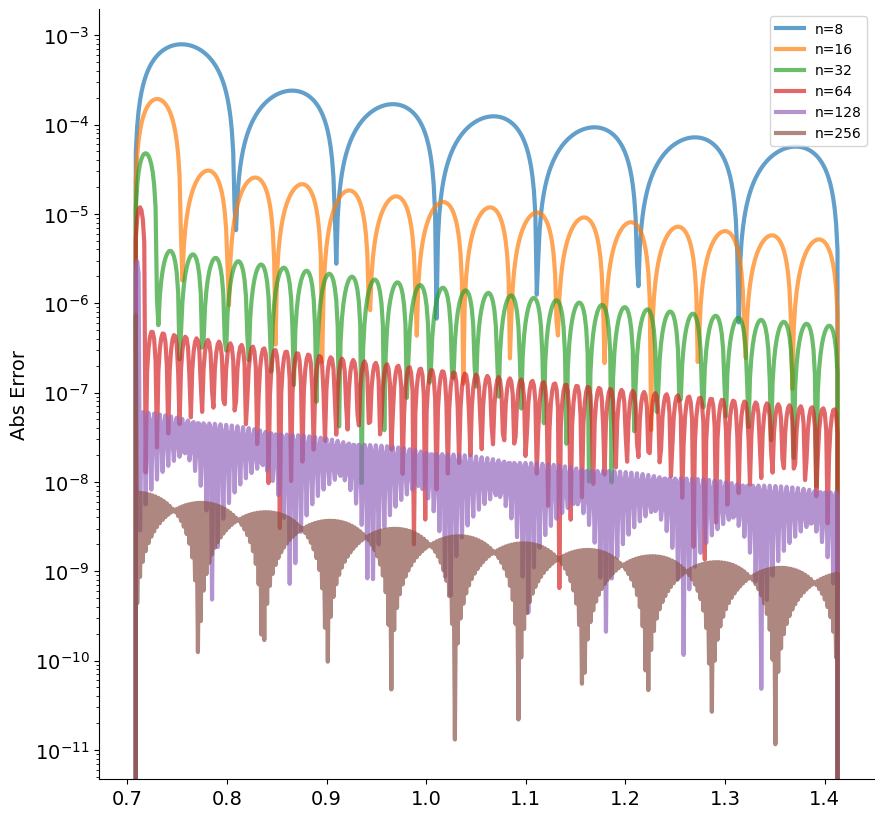

In [14]:
plt.figure(figsize=(10, 10))

a = 1 / np.sqrt(2)
b = np.sqrt(2)

for n_values in [8, 16, 32, 64, 128, 256]:
    x_values = np.linspace(a, b, n_values)
    log_values = np.log(x_values)
    delta_x = x_values[1] - x_values[0]

    xs = np.linspace(a, b, 500)
    ys = np.log(xs)

    bin_indices = np.digitize(xs, x_values)
    ys_lagrange = np.zeros_like(xs)
    for i, idx in enumerate(bin_indices):
        idx = idx.item()

        # quadratic approximation
        if idx == 0:
            pts = [(x_values[i], log_values[i]) for i in range(3)]
        elif idx == n_values:
            pts = [(x_values[bin_indices - 1 - i], log_values[bin_indices - 1 - i]) for i in range(3)]
        else:
            pts = [(x_values[idx + i], log_values[idx + i]) for i in range(-2, 1)]

        lagrange_intepolate_fn = functools.partial(lagrange_interpolate, pts=pts)
        ys_lagrange[i] = lagrange_intepolate_fn([xs[i]])[0]

    plt.semilogy(xs, np.abs(ys - ys_lagrange), alpha=0.7, label=f"n={n_values}")
remove_spines(plt.gca())
plt.ylabel("Abs Error")
plt.legend()